In [276]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

import matplotlib.pyplot as plt

from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw
from pathlib import Path

fonts = {
    'Arial': [],
    'Georgia': [],
}

fonts_path = Path('resource') / 'fonts'
for f in fonts:
    for i in range(ord('A'), ord('Z')+1):
        font = ImageFont.truetype(str((fonts_path/f'{f}.ttf').absolute()), 500)
        img = Image.new('RGB', (512,512), (0,0,0))
        draw = ImageDraw.Draw(img)
        draw.text((256,256), chr(i), (255,255,255), font=font, anchor='mm')
        draw = ImageDraw.Draw(img)

        fonts[f].append(img)

In [277]:
for k, v in fonts.items():
    fonts[k] = dict(zip(map(chr, range(ord('A'), ord('Z')+1)), v))

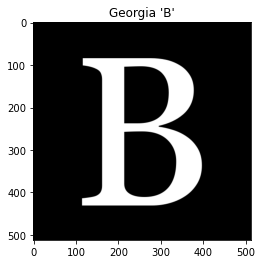

In [278]:
character= 'B'

img = fonts['Georgia'][character]

plt.figure(figsize=(4,4))
plt.imshow(img)
plt.title(f"Georgia '{character}'")
plt.show()

T = transforms.Compose([
    transforms.Resize(16),
    transforms.Grayscale(),
    transforms.ToTensor(),
])

x = T(img)

conv2d.weight.shape = torch.Size([9, 1, 5, 5])


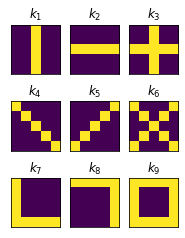

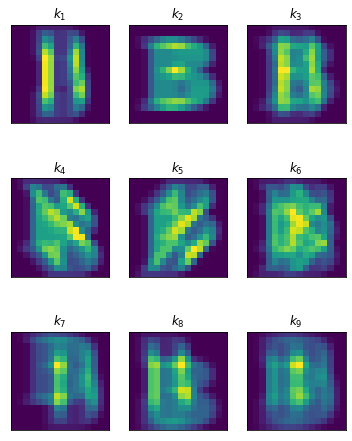

In [279]:
conv2d = nn.Conv2d(in_channels=1,
                   out_channels=9,
                   kernel_size=5,
                   stride=1,
                   padding=2,
                   bias=False)

print(f'{conv2d.weight.shape = }')

K = [
        [[[0,0,1,0,0],
          [0,0,1,0,0],
          [0,0,1,0,0],
          [0,0,1,0,0],
          [0,0,1,0,0]]],

        [[[0,0,0,0,0],
          [0,0,0,0,0],
          [1,1,1,1,1],
          [0,0,0,0,0],
          [0,0,0,0,0]]],

        [[[0,0,1,0,0],
          [0,0,1,0,0],
          [1,1,1,1,1],
          [0,0,1,0,0],
          [0,0,1,0,0]]],

        [[[1,0,0,0,0],
          [0,1,0,0,0],
          [0,0,1,0,0],
          [0,0,0,1,0],
          [0,0,0,0,1]]],

        [[[0,0,0,0,1],
          [0,0,0,1,0],
          [0,0,1,0,0],
          [0,1,0,0,0],
          [1,0,0,0,0]]],

        [[[1,0,0,0,1],
          [0,1,0,1,0],
          [0,0,1,0,0],
          [0,1,0,1,0],
          [1,0,0,0,1]]],

        [[[1,0,0,0,0],
          [1,0,0,0,0],
          [1,0,0,0,0],
          [1,0,0,0,0],
          [1,1,1,1,1]]],

        [[[1,1,1,1,1],
          [0,0,0,0,1],
          [0,0,0,0,1],
          [0,0,0,0,1],
          [0,0,0,0,1]]],

        [[[1,1,1,1,1],
          [1,0,0,0,1],
          [1,0,0,0,1],
          [1,0,0,0,1],
          [1,1,1,1,1]]],
    ]

K = torch.tensor(K, dtype=torch.float32)
conv2d.weight = torch.nn.Parameter(K)

plt.figure(figsize=(3, 4))
for i, kernel in enumerate(conv2d.weight, start=1):
    plt.subplot(3, 3, i)
    plt.title(fr"$k_{i}$")
    plt.imshow(kernel.detach().squeeze(0))
    plt.xticks([])
    plt.yticks([])

y = conv2d(x.squeeze(1))
plt.figure(figsize=(6, 8))
for i, kernel in enumerate(y, start=1):
    plt.subplot(3, 3, i)
    plt.title(fr"$k_{i}$")
    plt.imshow(kernel.detach().squeeze(0))
    plt.xticks([])
    plt.yticks([])

convtranspose2d.weight.shape = torch.Size([1, 9, 5, 5])


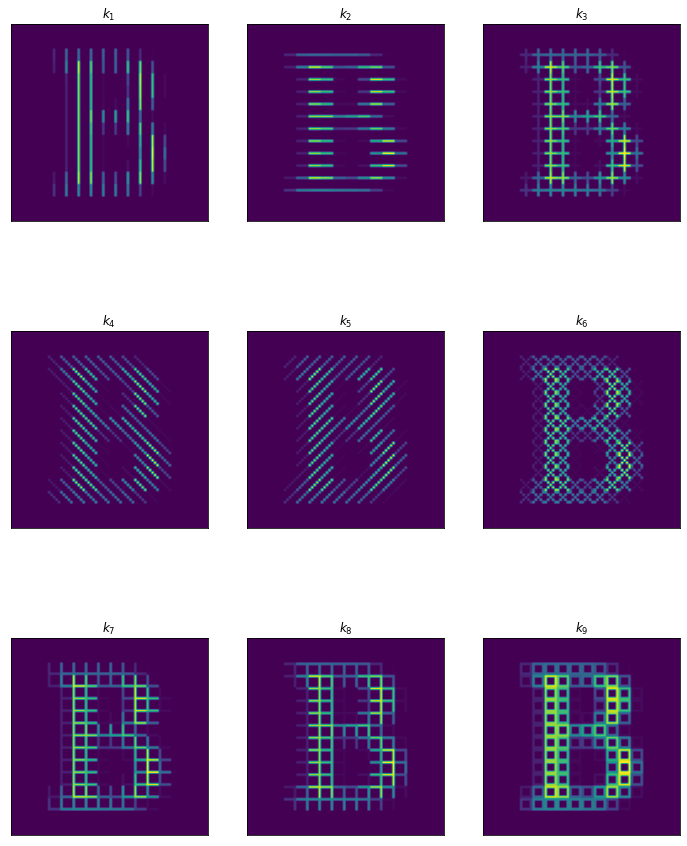

In [280]:
convtranspose2d = nn.ConvTranspose2d(in_channels=1,
                                     out_channels=9,
                                     kernel_size=5,
                                     stride=5,
                                     padding=0,
                                     bias=False)

print(f'{convtranspose2d.weight.shape = }')

K = [[
        [[0,0,1,0,0],
         [0,0,1,0,0],
         [0,0,1,0,0],
         [0,0,1,0,0],
         [0,0,1,0,0]],

        [[0,0,0,0,0],
         [0,0,0,0,0],
         [1,1,1,1,1],
         [0,0,0,0,0],
         [0,0,0,0,0]],

        [[0,0,1,0,0],
         [0,0,1,0,0],
         [1,1,1,1,1],
         [0,0,1,0,0],
         [0,0,1,0,0]],

        [[1,0,0,0,0],
         [0,1,0,0,0],
         [0,0,1,0,0],
         [0,0,0,1,0],
         [0,0,0,0,1]],

        [[0,0,0,0,1],
         [0,0,0,1,0],
         [0,0,1,0,0],
         [0,1,0,0,0],
         [1,0,0,0,0]],

        [[1,0,0,0,1],
         [0,1,0,1,0],
         [0,0,1,0,0],
         [0,1,0,1,0],
         [1,0,0,0,1]],

        [[1,0,0,0,0],
         [1,0,0,0,0],
         [1,0,0,0,0],
         [1,0,0,0,0],
         [1,1,1,1,1]],

        [[1,1,1,1,1],
         [0,0,0,0,1],
         [0,0,0,0,1],
         [0,0,0,0,1],
         [0,0,0,0,1]],

        [[1,1,1,1,1],
         [1,0,0,0,1],
         [1,0,0,0,1],
         [1,0,0,0,1],
         [1,1,1,1,1]],
    ]]

K = torch.tensor(K, dtype=torch.float32)
convtranspose2d.weight = torch.nn.Parameter(K)

y = convtranspose2d(x.squeeze(1))
plt.figure(figsize=(12, 16))
for i, kernel in enumerate(y, start=1):
    plt.subplot(3, 3, i)
    plt.title(fr"$k_{i}$")
    plt.imshow(kernel.detach().squeeze(0))
    plt.xticks([])
    plt.yticks([])

torch.Size([9, 80, 80])


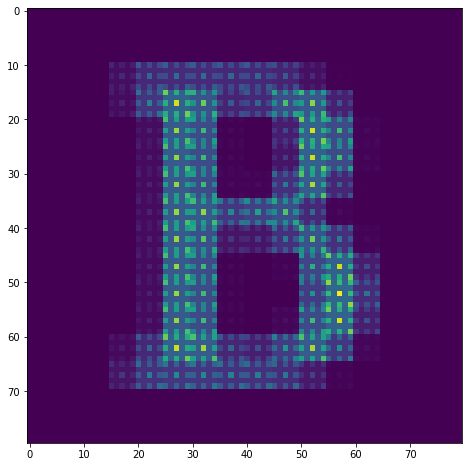

In [281]:
print(y.shape)

plt.figure(figsize=(8,8))
plt.imshow(y.sum(0).detach())
plt.show()